In [1]:
# data sources: 
# https://www.cbs.nl/nl-nl/dossier/nederland-regionaal/geografische-data/wijk-en-buurtkaart-2021
# http://download.cbs.nl/regionale-kaarten/kwb-1995.xls

In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np


from matplotlib.colors import TwoSlopeNorm
import matplotlib.pyplot as plt

In [3]:
# 2021 buurtkaart
data = gpd.read_file('WijkBuurtkaart_2021_v1/buurt_2021_v1.shp')\
    [['BU_CODE','GM_NAAM','AANT_INW','geometry']].rename(columns = {'AANT_INW':'pop_2021'}).set_index("BU_CODE")

In [4]:
# 2004 buurtdata
temp = gpd.read_file('kaart_2004/buurt_2004_gen.shp').set_index("BU_2004").rename(columns = {'AANT_INW':'pop_2004'})

data = pd.merge(data,temp.drop(["geometry"],axis=1),left_index=True,right_index=True)[["pop_2004","GM_NAAM_x","pop_2021","geometry"]]
data["p"] = (data["pop_2021"] - data["pop_2004"]) / (data["pop_2004"])

In [5]:
mask = \
    (data["pop_2021"]>10)&\
    (data["pop_2004"]>10)&\
    (data["GM_NAAM_x"]=="Almere")

In [6]:
gemeente = gpd.read_file('WijkBuurtkaart_2021_v1/gemeente_2021_v1.shp')

In [23]:
plt.rcParams["font.size"]=40
plt.rcParams["font.family"]="Helvetica"

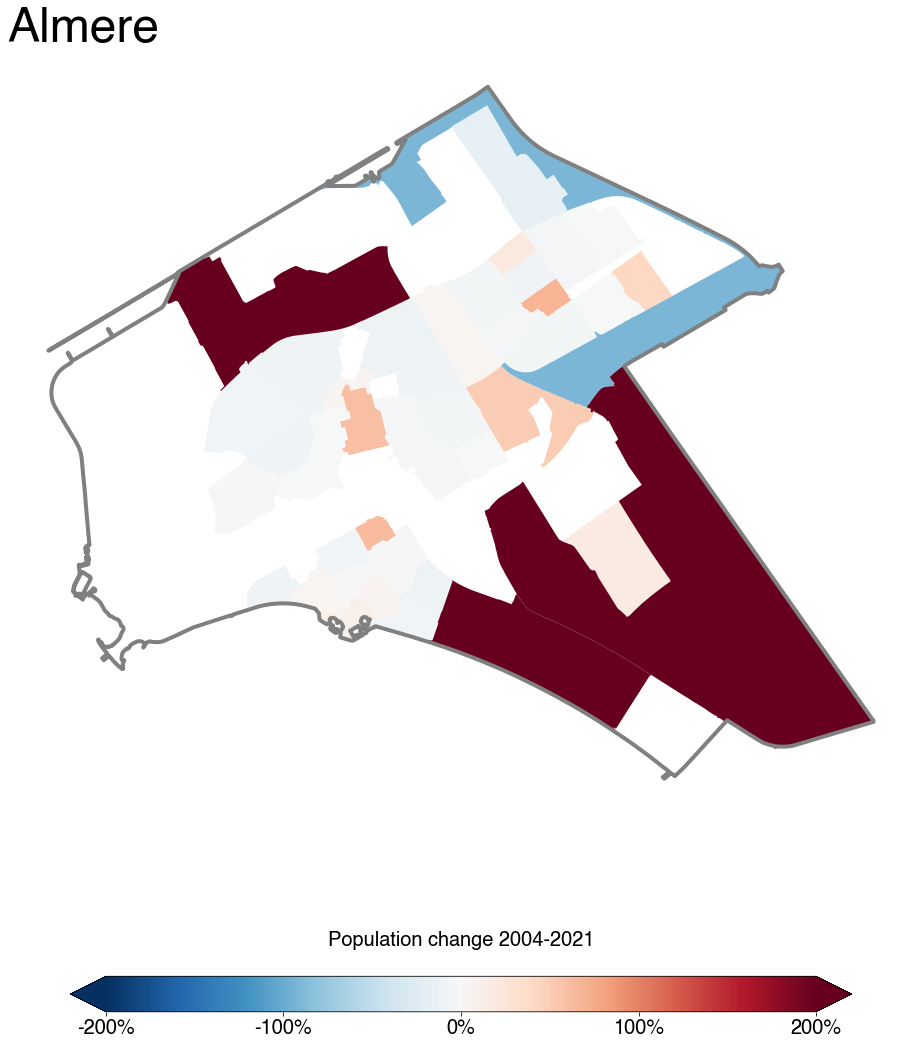

In [30]:
fig, ax  = plt.subplots(figsize=(20,20))
data[mask].plot(
    column="p",
    cmap="RdBu_r",
    norm=TwoSlopeNorm(vcenter=0,vmax=2,vmin=-2),
    ax=ax,
    legend=True,
    legend_kwds={
        'orientation': "horizontal",
        'shrink': 0.7,
        'ticks': [-2,-1,0,1,2],
        'extend': 'both'
    })

ax.set_title('Almere',loc="left")

cb_ax = fig.axes[1] 
cb_ax.set_xticklabels([str(int(x*100))+'%' for x in range(-2,3)])
cb_ax.tick_params(labelsize=20)
cb_ax.set_title('Population change 2004-2021',pad=30,fontsize=20)
gemeente[(gemeente.H2O=="NEE")&(gemeente.GM_NAAM=="Almere")].boundary.plot(ax=ax,color="grey",lw=4)
plt.axis('off')
plt.savefig('day11_population.png',dpi=300)